# Init ECG

In [48]:
import numpy as np
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
import os

In [62]:
data_path_500 = '../data/physionet.org/files/ptb-xl/1.0.3/records500/00000/00001_hr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_500)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df1 = pd.DataFrame(X, columns=cols, index=t)
df1.index.name = "time"

In [50]:
data_path_100 = '../data/physionet.org/files/ptb-xl/1.0.3/records100/21000/21656_lr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_100)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df2 = pd.DataFrame(X, columns=cols, index=t)
df2.index.name = "time"

# Datenanalyse ECK Daten
- Struktur anschauen

In [51]:
df1.head()

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
time,,,,,,,,,,,,
0 days 00:00:00,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.002000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.004000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.006000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.008000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075


Die EKG-Ableitungen sind die Features in den EKG-Daten.
- Ableitung nach Einthoven (I, II, III)     https://flexikon.doccheck.com/de/Ableitung_nach_Einthoven
- Ableitung nach Goldberger (aVR, aVL, aVF) https://flexikon.doccheck.com/de/Ableitung_nach_Goldberger
- Ableitung nach Wilson (V1-V6)             https://flexikon.doccheck.com/de/Ableitung_nach_Wilson

https://flexikon.doccheck.com/de/Elektrokardiogramm

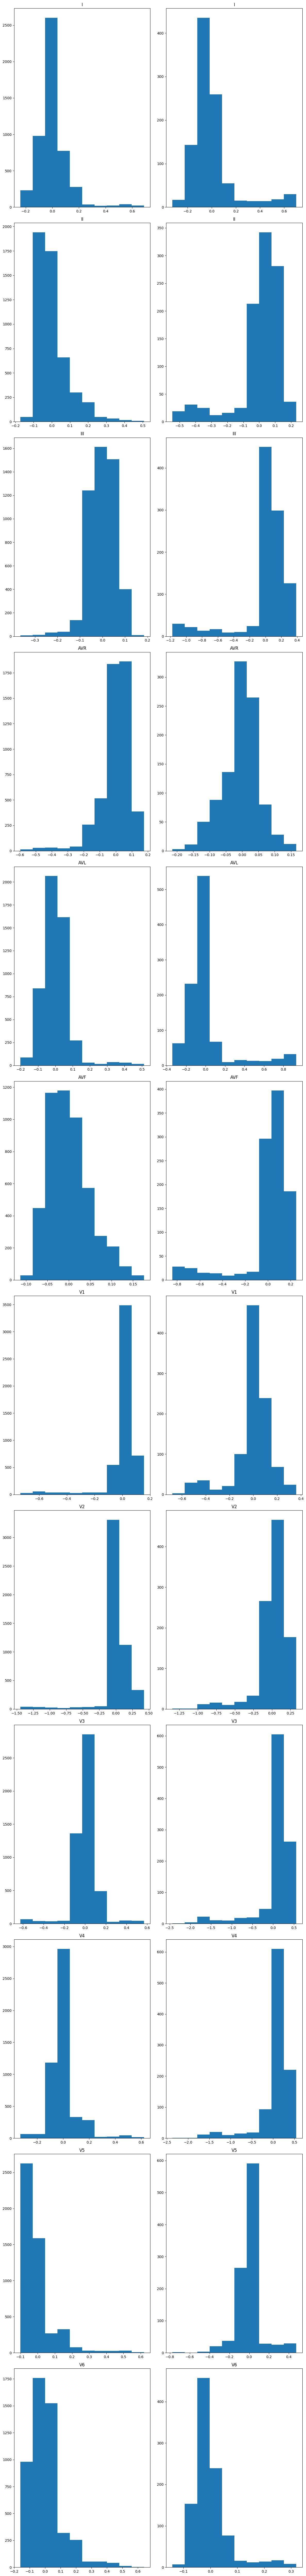

In [52]:
"""

Vergleich der Verteilungen zwischen 2 Personen


"""
fig, ax = plt.subplots(len(df1.columns), 2, figsize=(12, 100))

for i, col in enumerate(df1.columns):
    ax[i,0].hist(df1[col])
    ax[i,0].set_title(col)

for i, col in enumerate(df2.columns):
    ax[i,1].hist(df2[col])
    ax[i,1].set_title(col)

plt.tight_layout()
plt.show()

# Band Pass Filter

In [53]:
df1.head()

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
time,,,,,,,,,,,,
0 days 00:00:00,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.002000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.004000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.006000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075
0 days 00:00:00.008000,-0.115,-0.05,0.065,0.082,-0.09,0.007,-0.065,-0.04,-0.005,-0.035,-0.035,-0.075


In [54]:
from scipy import signal
import matplotlib.pyplot as plt

In [55]:
f_low = 0.5
f_high = 40
order = 4

sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
sig = signal.sosfiltfilt(sos, df1['I'].to_numpy())

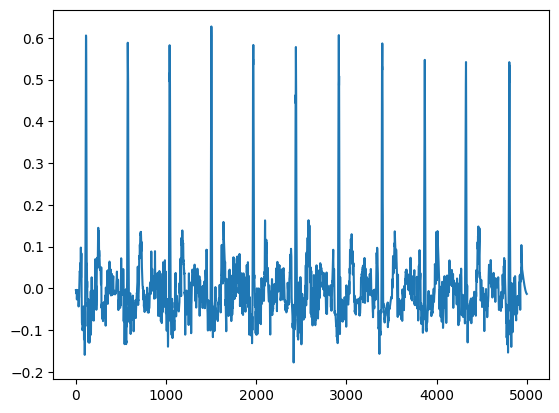

In [56]:
plt.plot(sig)
plt.show()

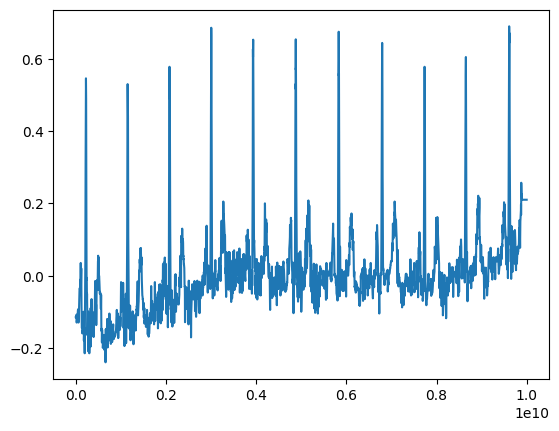

In [57]:
plt.plot(df1['I'])
plt.show()

ValueError: The length of the input vector x must be greater than padlen, which is 27.

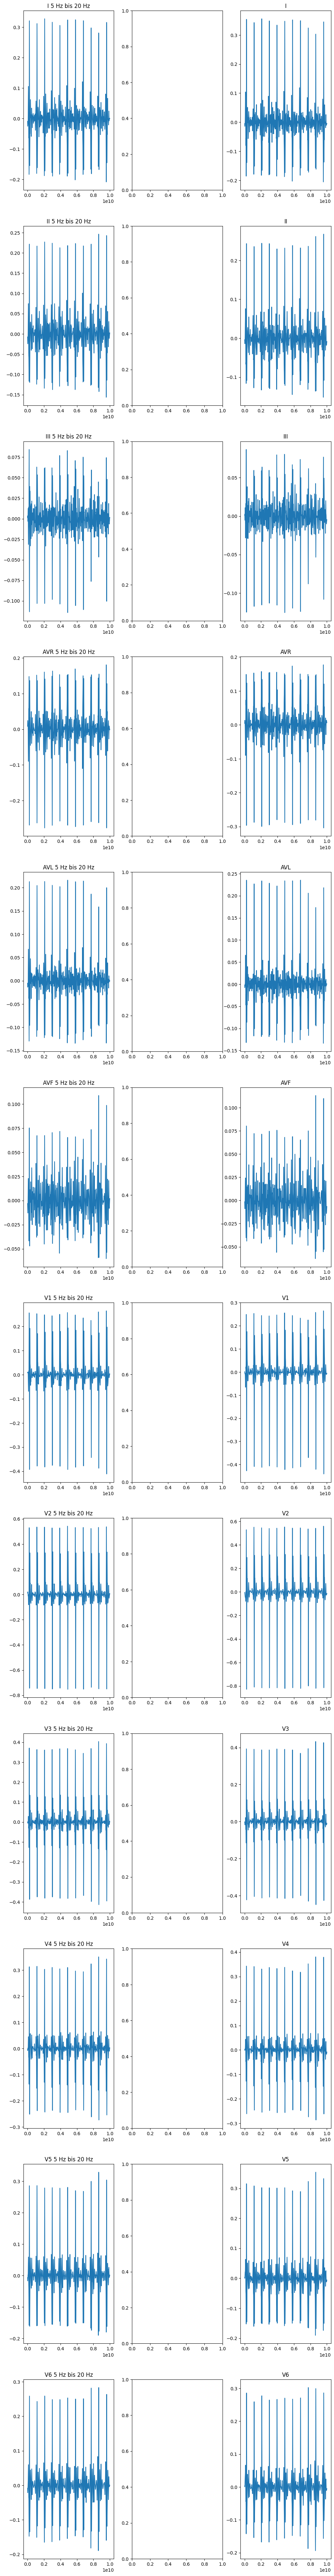

In [61]:
from sklearn.preprocessing import StandardScaler
df11 = df1
fig, ax = plt.subplots(len(df1.columns), 3, figsize=(12, 100))
scaler = StandardScaler()
f_low = 5
f_high = 20

# Plot vor dem filtern
for i, col in enumerate(df1.columns):
    ax[i,2].plot(df1[col])
    ax[i,2].set_title(col)

# Filter
for i, col in enumerate(df1.columns):
    sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
    sig = signal.sosfiltfilt(sos, df1[col].to_numpy())
    df1[col] = sig

# Data scaling nach dem filtern
#df1_transformed = scaler.fit_transform(df1)

# Plot skalierte und gefilterte Daten
for i, col in enumerate(df1.columns):
    ax[i,0].plot(df1[col])
    ax[i,0].set_title(f'{col} 5 Hz bis 20 Hz')

##########
f_low = 0.5
f_high = 50

for i, col in enumerate(df1.columns):
    sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
    sig = signal.sosfiltfilt(sos, df11[col].iloc[0:20].to_numpy())
    df11[col] = sig

# Data scaling nach dem filtern
#df1_transformed = scaler.fit_transform(df1)

# Plot skalierte und gefilterte Daten
for i, col in enumerate(df1.columns):
    ax[i,1].plot(df11[col])
    ax[i,1].set_title(f'{col} 0.5 Hz bis 40 Hz')

########

plt.tight_layout()
plt.show()

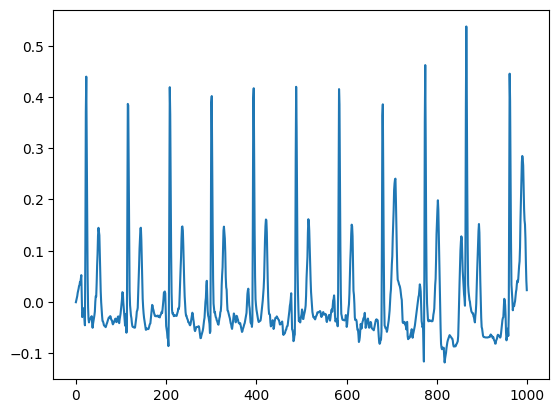

In [20]:
scaler = StandardScaler()
scaler.fit_transform(np.array([sig]))
plt.plot(sig)
plt.show()

In [65]:

sos = signal.butter(order, [f_low, f_high], btype='bandpass', fs=fs, output='sos')
sig = signal.sosfiltfilt(sos, df11[col].to_numpy())


AttributeError: Line2D.set() got an unexpected keyword argument 'figsize'

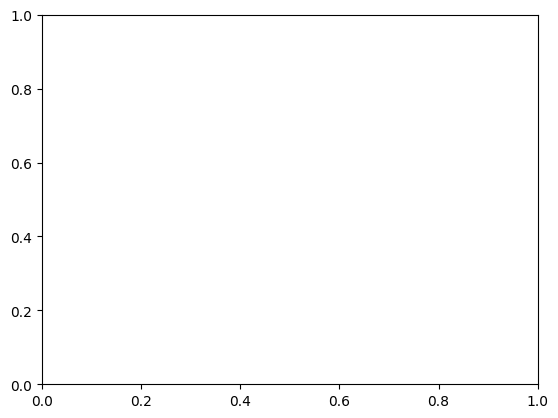

In [73]:
plt.plot(sig[0:5000], figsize=(12, 100))

plt.show()

In [71]:
len(sig)

5000

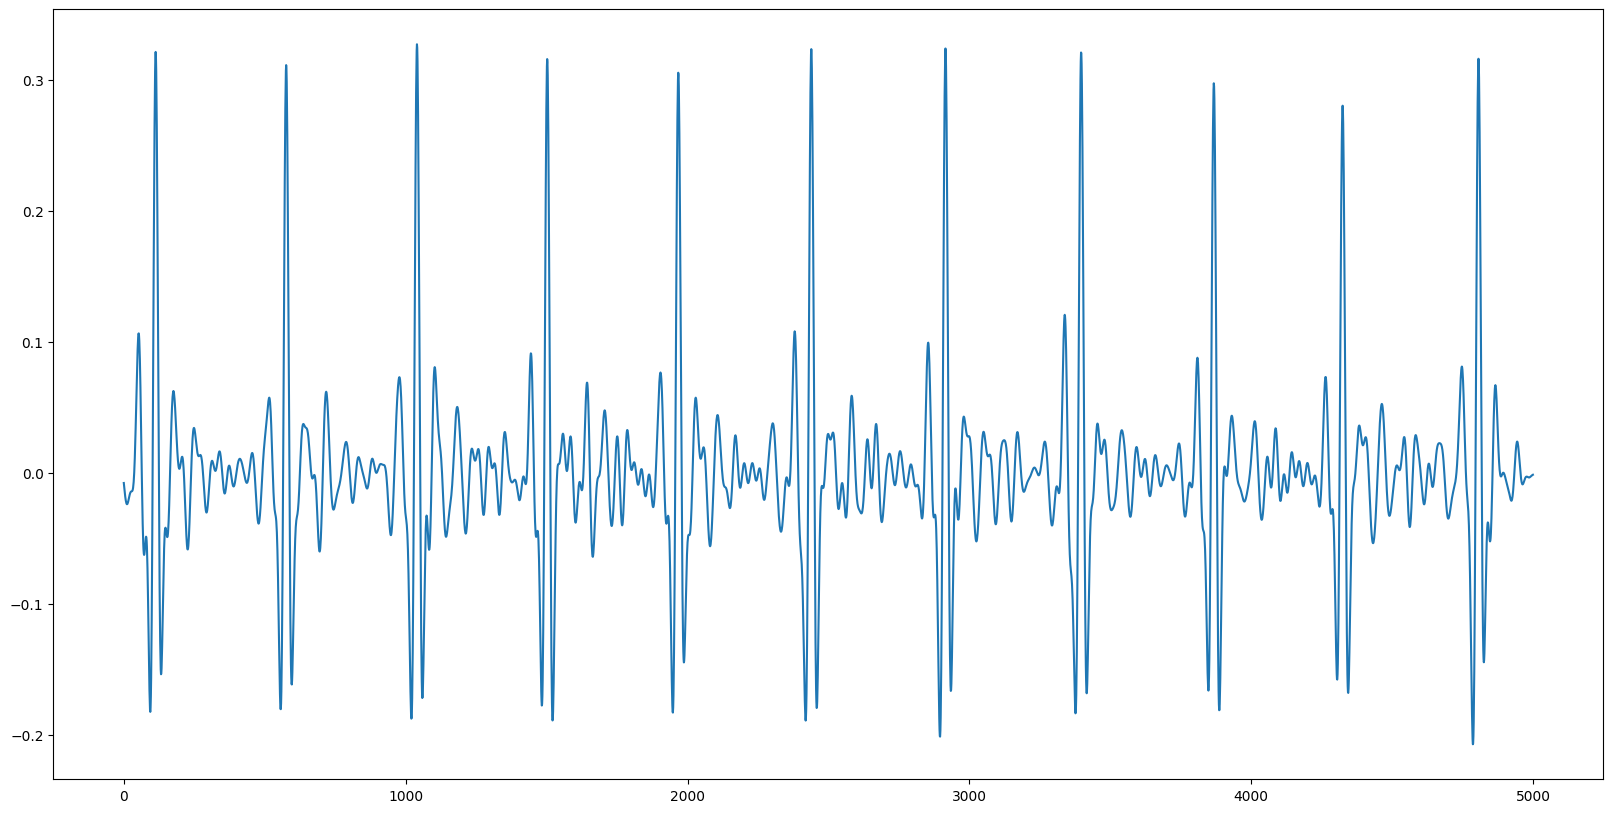

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(sig)
plt.show()